# Algoritmo de Clustering (Affinity Propagation)

## Importar las librerias a utilizar

In [37]:
import pandas as pd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

## Importar el data frame

In [38]:
path = 'C:/Users/Rodolfo/Documents/Trabajo Final Delfin 2018/Limpieza de datos/Limpieza eliminado las columas(p3, upm y con)/Modo individual/vivt_lim114.csv'
df_alg_lim111 = pd.read_csv(path, low_memory = False, encoding='latin')
df_alg_lim111.head()

,Unnamed: 0,loc,mun,est,est_d,t_loc,cd_a,ent,d_sem,n_pro_viv,v_sel,n_ent,per,p1,p2,ur,fac
0,0,1,1,30,2,1,14,1,101,28,1,1,114,3,1,1,106
1,1,1,1,30,2,1,14,1,101,60,2,1,114,5,1,1,106
2,2,1,1,30,2,1,14,1,101,93,3,1,114,6,1,1,106
3,3,1,1,30,2,1,14,1,101,127,4,1,114,3,1,1,106
4,4,1,1,30,2,1,14,1,101,161,5,1,114,6,1,1,106


## Eliminar columnas sin utilidad

In [39]:
df_alg_lim111.drop(df_alg_lim111.columns[df_alg_lim111.columns.str.contains('unnamed',case = False)],axis = 1)

,loc,mun,est,est_d,t_loc,cd_a,ent,d_sem,n_pro_viv,v_sel,n_ent,per,p1,p2,ur,fac
0,1,1,30,2,1,14,1,101,28,1,1,114,3,1,1,106
1,1,1,30,2,1,14,1,101,60,2,1,114,5,1,1,106
2,1,1,30,2,1,14,1,101,93,3,1,114,6,1,1,106
3,1,1,30,2,1,14,1,101,127,4,1,114,3,1,1,106
4,1,1,30,2,1,14,1,101,161,5,1,114,6,1,1,106
5,1,1,30,2,1,14,1,101,114,1,1,114,5,1,1,105
6,1,1,30,2,1,14,1,101,24,2,1,114,2,1,1,105
7,1,1,30,2,1,14,1,101,46,3,1,114,3,1,1,105
8,1,1,30,2,1,14,1,101,69,4,1,114,5,1,1,105
9,1,1,30,2,1,14,1,101,91,5,1,114,4,1,1,105


## Normalizar los datos

In [40]:
df_alg_lim111 = sk.preprocessing.normalize(df_alg_lim111, norm='l2', axis=1, copy=True)

## Crear un nuevo data frame ya normalizado

In [41]:
df_alg_lim111_norm = pd.DataFrame(df_alg_lim111)

In [42]:
df_alg_lim111_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000000,0.005246,0.005246,0.157385,0.010492,0.005246,0.073447,0.005246,0.529864,0.146893,0.005246,0.005246,0.598065,0.015739,0.005246,0.005246,0.556095
1,0.005053,0.005053,0.005053,0.151581,0.010105,0.005053,0.070738,0.005053,0.510322,0.303162,0.010105,0.005053,0.576007,0.025263,0.005053,0.005053,0.535586
2,0.009509,0.004754,0.004754,0.142634,0.009509,0.004754,0.066563,0.004754,0.480202,0.442166,0.014263,0.004754,0.542010,0.028527,0.004754,0.004754,0.503974
3,0.013194,0.004398,0.004398,0.131936,0.008796,0.004398,0.061570,0.004398,0.444185,0.558529,0.017591,0.004398,0.501357,0.013194,0.004398,0.004398,0.466174
4,0.016125,0.004031,0.004031,0.120934,0.008062,0.004031,0.056436,0.004031,0.407146,0.649014,0.020156,0.004031,0.459550,0.024187,0.004031,0.004031,0.427301


In [43]:
df_alg_lim111_norm.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
dtype: object

## Aplicar el Algoritmo

In [44]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs 

In [45]:
df_alg_lim111_norm, labels_true = make_blobs(n_samples=300, cluster_std=0.5,
                            random_state=0)

In [46]:
af = AffinityPropagation().fit(df_alg_lim111_norm)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_alg_lim111_norm, labels, metric='sqeuclidean'))

Estimated number of clusters: 8
Homogeneity: 1.000
Completeness: 0.540
V-measure: 0.702
Adjusted Rand Index: 0.474
Adjusted Mutual Information: 0.535
Silhouette Coefficient: 0.490


## Graficar

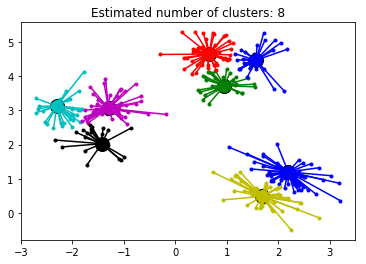

In [47]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = df_alg_lim111_norm[cluster_centers_indices[k]]
    plt.plot(df_alg_lim111_norm[class_members, 0], df_alg_lim111_norm[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in df_alg_lim111_norm[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Generar la nueva columna de Cluster

In [48]:
y_af = AffinityPropagation().fit_predict(df_alg_lim111_norm)

In [49]:
y_af

array([2, 5, 7, 4, 6, 4, 0, 2, 3, 4, 5, 0, 0, 7, 5, 4, 1, 1, 4, 5, 4, 1,
       5, 2, 3, 3, 1, 3, 0, 0, 4, 2, 1, 0, 5, 3, 0, 6, 2, 5, 4, 0, 2, 5,
       5, 4, 5, 6, 4, 5, 3, 0, 3, 4, 5, 2, 2, 4, 3, 7, 5, 0, 2, 3, 0, 3,
       1, 0, 2, 0, 4, 4, 3, 4, 0, 2, 0, 6, 2, 2, 3, 7, 0, 2, 2, 7, 5, 3,
       2, 1, 4, 0, 3, 7, 0, 5, 2, 5, 6, 1, 0, 4, 2, 5, 7, 7, 3, 7, 0, 5,
       2, 4, 7, 2, 4, 4, 2, 7, 5, 0, 5, 3, 0, 5, 0, 6, 0, 5, 5, 3, 4, 4,
       1, 3, 6, 0, 4, 1, 4, 6, 0, 2, 5, 1, 4, 4, 2, 4, 6, 5, 1, 6, 1, 0,
       6, 4, 5, 0, 2, 5, 2, 7, 0, 2, 4, 7, 7, 7, 1, 4, 0, 1, 4, 0, 0, 5,
       1, 0, 2, 7, 5, 4, 1, 2, 2, 1, 0, 6, 1, 4, 2, 2, 5, 5, 3, 1, 0, 4,
       7, 3, 5, 4, 1, 3, 5, 4, 2, 3, 2, 0, 1, 2, 6, 5, 0, 0, 0, 2, 6, 0,
       1, 5, 0, 0, 2, 3, 6, 1, 7, 4, 2, 5, 0, 1, 5, 3, 6, 6, 1, 2, 0, 4,
       4, 3, 3, 5, 4, 3, 2, 0, 0, 7, 5, 5, 4, 2, 5, 4, 7, 7, 3, 1, 6, 6,
       2, 4, 2, 0, 5, 0, 0, 1, 7, 2, 7, 7, 6, 3, 5, 7, 7, 5, 5, 5, 4, 0,
       6, 3, 0, 0, 4, 4, 4, 0, 7, 2, 4, 5, 1, 4], d

In [50]:
df_alg_lim111_norm1 = pd.DataFrame(df_alg_lim111_norm)

In [51]:
df_alg_lim111_norm1["Cluster"] = y_af

In [52]:
df_alg_lim111_norm1

,0,1,Cluster
0,0.519859,4.862295,2
1,1.692469,0.205982,5
2,1.356789,4.364625,7
3,-1.569869,3.015029,4
4,-1.636675,2.375864,6
5,-1.522590,3.181384,4
6,1.039925,1.929910,0
7,0.363552,4.725969,2
8,-2.007156,2.521324,3
9,-0.657468,3.415079,4
